# Amazon Network Data EDA

The dataset from *[Stanford Network Analysis Project.](https://snap.stanford.edu/data/index.html)*

## Data Information
Network was collected by crawling Amazon website. It is based on *Customers Who Bought This Item Also Bought* feature of the Amazon website. If a product i is frequently co-purchased with product j, the graph contains a directed edge from i to j.

## EDA Dataset
For this Exploratory Data Analysis only a [subset](https://snap.stanford.edu/data/amazon0302.html) of the all Amazon Network dataset was taken (data from March 02 2003). 



In [67]:
import numpy as np
import graphlab as gl
gl.canvas.set_target('ipynb')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Product Co-Purchased Data into Sgraph

In [8]:
# Load graph
graph = gl.load_graph('data/amazon0302.txt.gz', 'snap')
# num_edges: 1234877
# num_vertices: 262111

PROGRESS: Finished parsing file /Users/marvinbertin/Desktop/data/amazon0302.txt.gz
PROGRESS: Parsing completed. Parsed 1234877 lines in 0.527384 secs.


In [60]:
graph

SGraph({'num_edges': 1234877, 'num_vertices': 262111})
Vertex Fields:['__id']
Edge Fields:['__src_id', '__dst_id']

# Visualize Co-purchased Data of Product ID 1-5

In [48]:
subgraph = graph.get_neighborhood(ids=range(6), radius=1, full_subgraph=False)
subgraph.show(vlabel='__id',highlight= range(6), arrows=True)

# Visualize Co-Purchased Data of Product ID 20-32

In [145]:
subgraph = graph.get_neighborhood(ids=range(20, 33), radius=1, full_subgraph=False)
subgraph.show(vlabel="__id",highlight= range(20, 33), arrows=True, ewidth=0.3, node_size=140, vlabel_hover=True)

# Products with Large in-degree, out-degree, and overall degree

In [61]:
def count_degree(src, edge, dst):
    dst['in_degree'] += 1
    src['out_degree'] += 1
    return (src, edge, dst)

def get_degree(g):
    new_g = gl.SGraph(g.vertices, g.edges)
    new_g.vertices['in_degree'] = 0
    new_g.vertices['out_degree'] = 0
    return new_g.triple_apply(count_degree, ['in_degree', 'out_degree']).get_vertices()

In [62]:
sf_degree = get_degree(graph)
sf_degree['total_degree'] = sf_degree['in_degree'] + sf_degree['out_degree']

In [63]:
sf_degree

__id,in_degree,out_degree,total_degree
262099,9,5,14
262094,1,5,6
262036,6,5,11
262031,4,5,9
262017,1,5,6
262015,2,5,7
262013,1,4,5
261950,6,5,11
261931,2,5,7
261913,2,5,7


# Visualize Degree Distributions

In [69]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

def clean_plot(ax):
    for x in ax.spines.values():
        x.set_visible(False)
    ax.grid(True, 'major', color='w', linestyle='-', linewidth=1.4)
    ax.patch.set_facecolor('0.92')
    ax.set_axisbelow(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

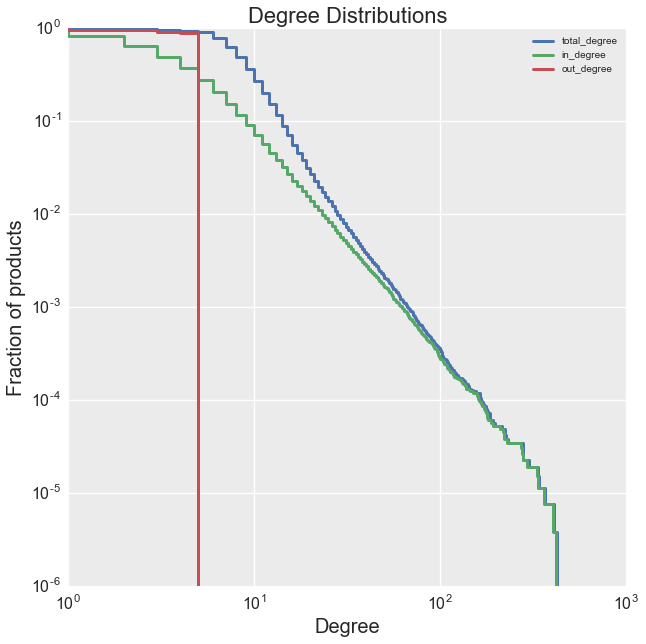

In [72]:
fig, ax = plt.subplots()

for deg_type in ['total_degree', 'in_degree', 'out_degree']:
    counts = np.bincount(list(sf_degree[deg_type]))
    ecdf = np.cumsum(counts) / float(sf_degree.num_rows())
    ax.step(range(len(ecdf)), 1 - ecdf, lw=3, where='post', label=deg_type)

ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Degree")
ax.set_ylabel("Fraction of products")
ax.set_title("Degree Distributions")
clean_plot(ax)

* Large majority of products have a Total Degree of about 6 or above.
* A good proportion of products have a large Total Degree between 100-400.

# Degree Outliers

In [79]:
print "Total-degree outliers"
sf_degree.topk('total_degree', k=5)

In-degree outliers


__id,in_degree,out_degree,total_degree
14949,420,5,425
4429,404,5,409
33,361,5,366
10519,334,5,339
12771,330,5,335


In [87]:
print "Out-degree outliers"
sf_degree.topk('out_degree', k=5)

Out-degree outliers


__id,in_degree,out_degree,total_degree
262099,9,5,14
262094,1,5,6
262036,6,5,11
262031,4,5,9
262017,1,5,6


## Something fishy about out-degree

In [89]:
sf_degree['out_degree'].unique()

dtype: int
Rows: 6
[2, 0, 5, 4, 3, 1]

** Interestingly every product doesn't have more than 5 out-degree**

In [93]:
proportion_5 = sum(sf_degree['out_degree'] == 5) / float(len(sf_degree['out_degree']))
print "Proportion of out-degree == 5: ", proportion_5

Proportion of out-degree == 5:  0.892259386291


# Pagerank Algorithm to Identify the Most Influential Product

    "PageRank works by counting the number and quality of links to a page to determine a rough estimate of how       important the node is. The underlying assumption is that more important nodes are likely to receive more links   from other nodes."

In [95]:
pagerank_model = gl.pagerank.create(graph, verbose =False)
pagerank_graph = pagerank_model['graph']

pagerank_out = pagerank_model['pagerank']
pagerank_out.topk('pagerank', k=10)

__id,pagerank,delta
33,282.918067086,0.506583513519
93,251.566842838,0.456146200926
8,223.401325002,0.126130297959
2501,206.593950803,0.0969313117485
94,206.043520319,0.427786652087
4429,193.178503517,0.0209731444915
56,178.565708725,0.362861540252
95,176.051163287,0.356004734444
151,169.331771104,0.298081414703
2353,162.326615018,0.0718437036488


** Product with id = 33 is the most influential  product in this dataset.**

**It was also one of the outliers with the most total-degree (366).**

# Most Influential Product (ID: 33)

In [148]:
# Visualize all 366 connections of the most influential product
subgraph = graph.get_neighborhood(ids= 33, radius=1, full_subgraph=False)
subgraph.show(vlabel="__id", highlight= [33], arrows=True, ewidth=0.3, vlabel_hover=True, node_size=300)

# How are the 20 most influential products co-purchased?

In [119]:
influential_products = pagerank_out.topk('pagerank', k=20)['__id']
subgraph = graph.get_neighborhood(ids= influential_products, radius=0, full_subgraph=True)
subgraph.show(vlabel='__id', highlight= influential_products, arrows=True, ewidth=0.7, node_size=300)

** There are different clusters of co-purchased influential products.**

** Product 9,106 seems to not be connected/co-purchased with other influential products.**

# Connected Components

    A weakly connected component is a maximal subgraph of a directed graph such that for every pair of vertices  u, v in the subgraph, there is an undirected path from u to v and a directed path from v to u. 

In [121]:
cc = gl.connected_components.create(graph, verbose=False)
cc_out = cc['component_id']
print "Connected components summary:\n", cc.summary()

Connected components summary:
Class                                   : ConnectedComponentsModel

Graph
-----
num_edges                               : 1234877
num_vertices                            : 262111

Results
-------
graph                                   : SGraph. See m['graph']
component size                          : SFrame. See m['component_size']
number of connected components          : 1
vertex component id                     : SFrame. See m['componentid']

Metrics
-------
training time (secs)                    : 0.9353

Queryable Fields
----------------
graph                                   : A new SGraph with the color id as a vertex property
component_id                            : An SFrame with each vertex's component id
component_size                          : An SFrame with the size of each component
training_time                           : Total training time of the model

None


In [128]:
cc_out

__id,component_id
5,1057
7,1057
8,1057
10,1057
27,1057
29,1057
33,1057
47,1057
50,1057
52,1057


In [122]:
cc_size = cc['component_size'].sort('Count', ascending=False)
cc_size

component_id,Count
1057,262111


** Count equals the number of vertices.**

** There is actually just one component in this graph (no islands).**

# What are the co-purchased products of Product_13's co-purchased products?

In [167]:
productX = graph.get_edges(dst_ids= 13)

subgraph = gl.SGraph()

for f in productX['__src_id']:
    subgraph = subgraph.add_edges(graph.get_edges(src_ids=None, dst_ids=[f]),
                                  src_field='__src_id', dst_field='__dst_id')
    
subgraph.show(highlight=list(productX['__src_id']), vlabel='__id', vlabel_hover=True, 
              arrows=False, ewidth=0.7, node_size=100)

# Distribution of Distances from the Most Influential Product (ID: 33)

In [170]:
sp = gl.shortest_path.create(graph, source_vid=33, verbose=False)
sp_graph = sp['graph']

In [173]:
mostInfluential_sf = sp_graph.get_vertices(ids=graph.vertices['__id'])
mostInfluential_sf['distance'].show()

** 99% of all the products are within 36 'hops' from the most influential product.**

In [177]:
mean_dists = {}

most_influential_10 = pagerank_out.topk('pagerank', k=10)['__id']

for product in most_influential_10:

    # get single-source shortest paths
    sp2 = gl.shortest_path.create(graph, source_vid=product, verbose=False)
    sp2_graph = sp2.get('graph')
    sp2_out = sp2_graph.get_vertices(ids=graph.vertices['__id'])

    # Compute some statistics about the distribution of distances
    mean_dists[product] = sp2_out['distance'].mean()

In [178]:
mean_dists

{8: 1.526071015714727e+25,
 33: 1.526071015714727e+25,
 56: 1.526071015714727e+25,
 93: 1.526071015714727e+25,
 94: 9.999961848224596e+29,
 95: 1.526071015714727e+25,
 151: 1.526071015714727e+25,
 2353: 1.526071015714727e+25,
 2501: 1.526071015714727e+25,
 4429: 1.526071015714727e+25}

# Triangle Counting

    Triangles in a graph are complete subgraphs with only three vertices. The number of triangles to which an        product belongs is a measure of the connectivity of its 'social network'.

In [18]:
triangle_counting_model = gl.triangle_counting.create(graph)
triangle_counting_graph = triangle_counting_model['graph']
triangle_counting_graph.vertices

PROGRESS: Initializing vertex ids.
PROGRESS: Removing duplicate (bidirectional) edges.
PROGRESS: Counting triangles...
PROGRESS: Finished in 5.99601 secs.
PROGRESS: Total triangles in the graph : 717719


__id,triangle_count
5,79
7,38
8,166
10,34
27,25
29,48
33,241
47,9
50,6
52,31


# Importance and Connectivity of Products in One Table

In [20]:
# Joined the computed statistics in a new graph
v = pagerank_graph.vertices.join(triangle_counting_graph.vertices)
joined_graph = gl.SGraph(v, graph.edges)
joined_graph.vertices

__id,pagerank,delta,triangle_count
262099,1.7286942648,1.38073115812e-05,22
262094,0.184279255892,1.51843367713e-07,3
262036,1.28793569457,9.27235263513e-05,14
262031,0.476348021144,0.000203442639,8
262017,0.187611446814,4.75773301034e-08,4
262015,0.265933117716,4.9584102515e-06,6
262013,0.194598418036,4.0723901969e-06,3
261950,0.699030623725,0.000199375524433,4
261931,0.264054212718,4.1403055337e-06,4
261913,0.251184535537,4.74309107973e-06,1
